# Raindeer: Weather in Germany over the past centuries

## Motivation:
The aim of this project is to provide an intuitive tool to visualize and analyze weather data from all german states in a clear and easy manner while providing more advanced analysis tools for users that want to have a more in-depth look at the topic. For this reason there are several functional modes to the tool that can be selected.

## Setup:

In [1]:
from user_stories import *
from IPython.display import Image, display

## Getting started:
One first things one would want to do when analyzing data is to get the data itself from a desired source, in our case this would be the page of the Deutscher Wetterdienst. The software has  functionality to do just that. For this purpose we use the dataframe_helper function, it takes the arguments:


``data``: takes either a list or string of possible dataset types used by the Dwd.

``interval``: takes either a string or list with the either of following two parameters "monthly" or "annual"

``month_range``: define the months used in dataframe only for interval monthly

``option`` is True or False - Write or read only "w" for write, "r" for df output only.

In practice it works like this:

In [2]:
dataframe_helper(['precipitation', 'sunshine_duration', 'air_temperature_mean'], 'annual', '01', 'w')

[     Jahr brandenburg/berlin brandenburg baden-wuerttemberg  bayern  hessen  \
 0    1882              673.6       673.0             1255.2  1085.3  1005.1   
 1    1883              500.6       500.3              870.5   832.4   656.8   
 2    1884              635.4       634.3              776.4   797.2   699.4   
 3    1885              550.2       549.7              990.9   830.2   691.8   
 4    1886              509.6       509.2             1063.1   863.9   745.3   
 ..    ...                ...         ...                ...     ...     ...   
 136  2018              390.4       390.3              765.0   757.3   576.4   
 137  2019              505.4       504.6              932.6   860.5   728.8   
 138  2020              511.1       511.4              816.0   861.0   656.5   
 139  2021              600.1       600.6              980.9   962.8   743.1   
 140  2022              434.3       435.0              839.7   817.6   681.1   
 
     mecklenburg-vorpommern niedersach

As we can see this took the desired data from the website of the Dwd and gave us csv tables for all given inputs datasets. This data can now be further processed and used with the other functionalities of the software.

##  Generating the first plot
Now that we have data lets see what we can do with it, for starters, lets just visualize the precipitation in germany for all years that we have data. For this we use the function ``plot_between_years`` in the simple plotting mode, it also can be used to create very customized plots which we will see later.

It uses a series of imput parameters:

``data``: takes either a list or string of possible dataset types used by the Dwd.

``interval``: takes either a string or list with the either of following two parameters "monthly" or "annual"

``yearsmonths``: define the years and months used in dataframe as a list of 2 6-digit strings representing a year followed by a month.

``state`` define the state which should be plotted.

``case`` define what kind of labels should be put on the plot from ``rain, temp, sun``.

``mode`` defines if the ``simple`` or ``custom`` plotting function should be used, the custom function takes a lot of inputs after execution to define how the plot shoul look. When choosing ``custom`` the previous parameters become unnecessary. 

Successfully saved: /results/user_stories/plots/between_years.png


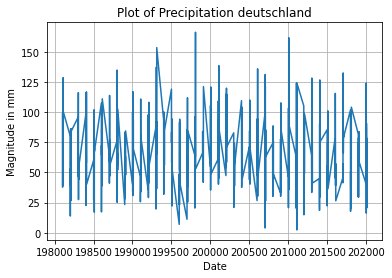

In [3]:
plot_between_years('precipitation', 'monthly', [198101, 202101], 'deutschland', 'rain', 'simple')

## Plotting multiple weather parameters at once / What are general developments in the weather data?
Next lets look at how we can display multiple weather parameters at once to look at trends and correltation in the data. For this we use the functionality ``plot_weather_parameters_annual``. It lets us plot precipitation, sunshine and temperature at once. With this we can look at possible correlations between the three parameters in the dwd-data. 

The ``plot_weather_parameters_annual`` function uses a bunch of parameters:

``time``: uses a list of years to plot from the dataset

``place``: takes a string specifiying the state for the data to be plotted.

``data``: takes the path of the dataset for the plot

Successfully saved: /results/user_stories/plots/weather_param_annual.png


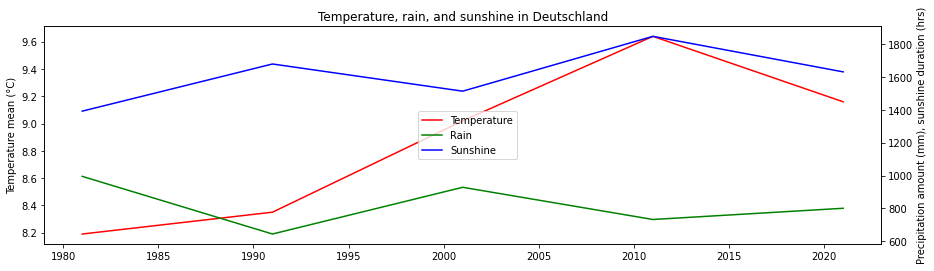

In [4]:
plot_weather_parameters_annual([1981, 1991, 2001, 2011, 2021], "Deutschland", f"{parent_dir}/raindeer/data/annual")

As we can see from the excerpt of years we plotted there seems to be a correlation between rain and sunshine which is intuitive given the reason why rain occurs beeing clouds. Temperature on the other hand just shows an increase on average through the years which is caused by climate change. this increasing trend will show up in the next segment again.

## Forecasting weather data
The software allows the user to do simple linear regression forecasting of the current temperature data at hand. This might be useful for short term prediction but is not meant for long time forecasting as a linear regression is not sophisticated enough to do that. To use this functionality we use the function ``predict_temperature_next_year``. It doesn't need any additional input as it uses the full dataset we saved as csv earlier. The result looks like this:

Successfully saved: /results/user_stories/plots/linear_regression.png


10.0

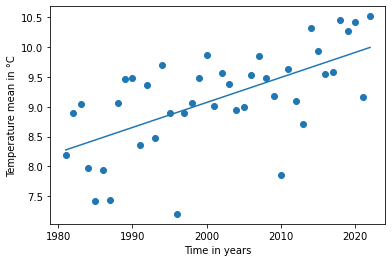

In [5]:
predict_temperature_next_year()

As we can see the prediction for the mean temperature in the next year is 10 degrees celsius. In the data a linear warming trend is clearly visible that is in line with the phenomenon of global warming. The linear regression shows a warming in germany of about 2 degrees which is quite substantial.

## Looking for patterns in the weather data
So far we looked at the weather data as a plot of time to find possible patterns or developments and even made a small forecast. We now want to take a different approach to finding patterns in the data, Fourier-Analysis. With Fourier-Analysis we tranform our data from time-basis to frequency-basis, which will show repeating patterns in the data clearly. The function used is ``fourier`` and takes a csv dataframe of choice, it also need to be given the type of weather data used to generate the correct plot handles. Then it does the Fourier-Transformation and displays the frequency data

It needs the following parameters to work:

``data``: takes string which specifies the dataset.

``interval``: takes a string with the either of following two parameters "monthly" or "annual"

``state``: define the state which should be analized

``case``: gives the program the information for the plot handles

Successfully saved: /results/user_stories/plots/fourier_analysis.png


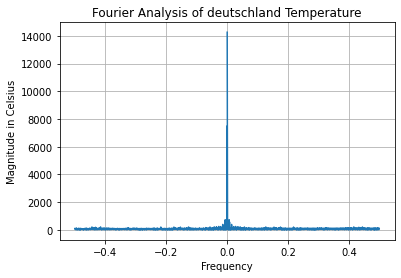

In [6]:
fourier_analysis('air_temperature_mean', 'monthly', ['deutschland'], 'temp')

As we can see there are multiple frequency spikes in the data. Ingoring the spike at zero as it just refers to an infinite peroid we see spikes up to a frequency of about 0.41. The spike at 0.08 is the annual temperature period. There are frequency spikes closer to zero which refer to longer timescales.

# simple-plot

Another way to visualize data, is via the simple-plot mode.
With this mode we can visualize date based on three different input parameters:
1. The timerange (month, year)
2. The Bundesländer (Brandenburg, Berlin...)
3. The weather phenomenom (temperature, precipitation...)

We can make use of the fact, that each input parameter can have multipe values (or a range of values),  to answer a varriety of research questions.

We can, for example compare different Bundesländer, with regards to any of the available "weather phenomenoms" and timeframes.
If we want to compare the precipitation in "Brandenburg", "Hessen" und "Bayern" from the year 1981 to 2022, we simple need to input thous parameteres and get the following graph:

python: can't open file '/Users/sissy/Documents/Uni/Computational Science/Sommer 2023/Research Software Engineering/raindeer/raindeer/../raindeer/raindeer.py': [Errno 2] No such file or directory


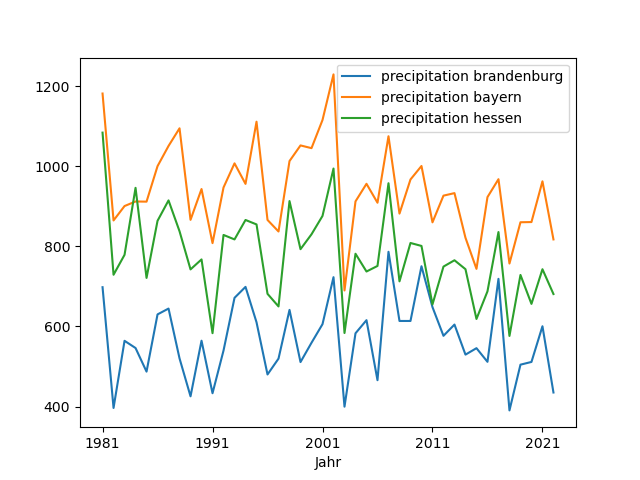

In [7]:
!python ../raindeer/raindeer.py ../data/annual --outfile "../results/user_stories/plots/simple_plot1.png" --mode=simple-plot -y 1981..2022 -b "brandenburg" "hessen" "bayern" -w "precipitation"

display(Image(filename = "../results/user_stories/plots/simple_plot1.png"))

We can also compare multiple different weather phenomenon in different Bundesländern. If we, for example, compare Brandenburg and Hessen we see, that Hessen has more precipitation and less sunshine duration.

This is verry useful, when analyzing the correlation between different weather phenomenons. In this example, we can see that more precipitation evidently correlates to less sunshine duration.

python: can't open file '/Users/sissy/Documents/Uni/Computational Science/Sommer 2023/Research Software Engineering/raindeer/raindeer/../raindeer/raindeer.py': [Errno 2] No such file or directory


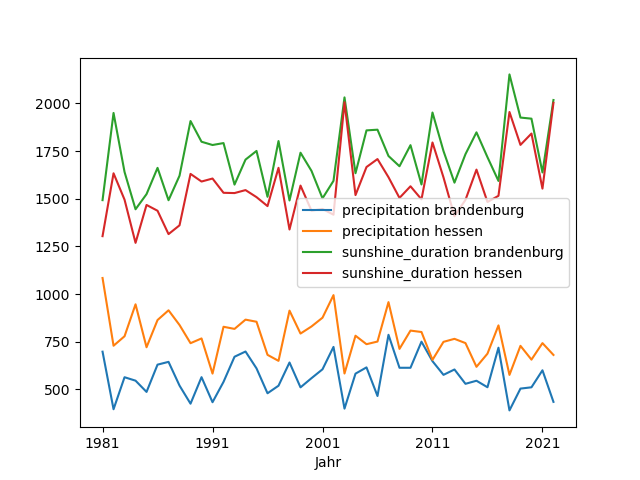

In [8]:
!python ../raindeer/raindeer.py ../data/annual --outfile "../results/user_stories/plots/simple_plot2.png" --mode=simple-plot -y 1981..2022 -b "brandenburg" "hessen" -w "precipitation" "sun"

display(Image(filename = "../results/user_stories/plots/simple_plot2.png"))

Lastly, it is also possible to employ a monthly range 

python: can't open file '/Users/sissy/Documents/Uni/Computational Science/Sommer 2023/Research Software Engineering/raindeer/raindeer/../raindeer/raindeer.py': [Errno 2] No such file or directory


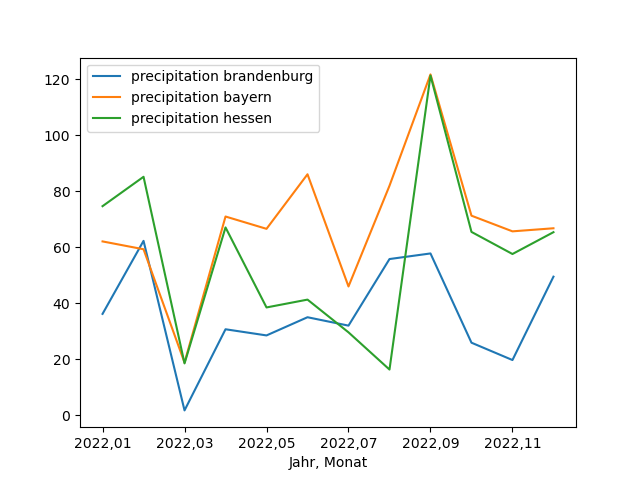

In [9]:
!python ../raindeer/raindeer.py ../data/annual --outfile "../results/user_stories/plots/simple_plot3.png" --mode=simple-plot -y 2022 -m "January..December" -b "brandenburg" "hessen" "bayern" -w "precipitation"

display(Image(filename = "../results/user_stories/plots/simple_plot3.png"))

## Summary
As we have seen this software provides many opportunities to look at the weather in germany for quite some time. Using the diffrent functionalities of the software several research questions were answered. We have seen that sunshine and rain are as expected correlated with eachother were more rain means less sunshine. Additionaly we have seen that there is a definitive rising trend in the temperature data in germany from both the single plot and the plot of all weather parameters. We then used linear regression to fit this rise in temperature and predicted the temperature for the coming year which worked out to be 10 degrees celsius. We also saw that there are reoccuring patterns in the weather data via fourier-analysis.

## Conclusion
This software gives a good opportunity to familiarize oneself with working with weather data and gaining first insights into the historical weather data for germany. It provides the tools for surface level analysis of the data and also has functionality to look at more specific things. Overall it produces insightful plots and can be a useful tool for analysis.